In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_data = pd.read_csv(r"C:\Users\User\Desktop\p3\Titanic.csv") # we have already trained titanic data set
test_data = pd.read_csv(r"C:\Users\User\Desktop\p3\test.csv")
combine = [train_data, test_data]
combine

[     passengerId  survived  pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   name     sex   age  sibsp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [3]:
train_data.head()

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data Analysis

In [5]:
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passenger

In [6]:
train_data.describe()

,passengerId,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.describe(include=['O'])

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",male,CA. 2343,G6,S
freq,1,577,7,4,644


## Analyzing data by pivot table

In [8]:
train_data[['pclass','survived']].groupby(['pclass'],as_index=False).mean()

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_data[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_data[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.742038
1,male,0.188908


In [11]:
train_data[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_data[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='parch',ascending=True)

,parch,survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [13]:
train_data[['fare']].describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


## Data Analysis by visualising

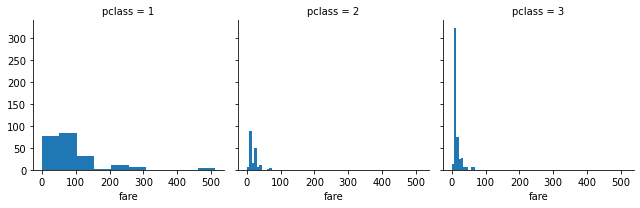

In [14]:
g = sns.FacetGrid(train_data, col='pclass')
g.map(plt.hist,'fare', bins=10)

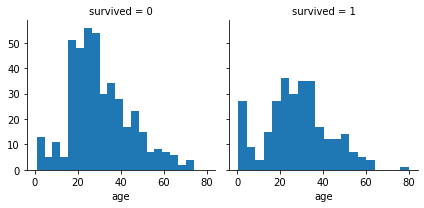

In [15]:
g = sns.FacetGrid(train_data, col='survived')
g.map(plt.hist, 'age', bins=20)

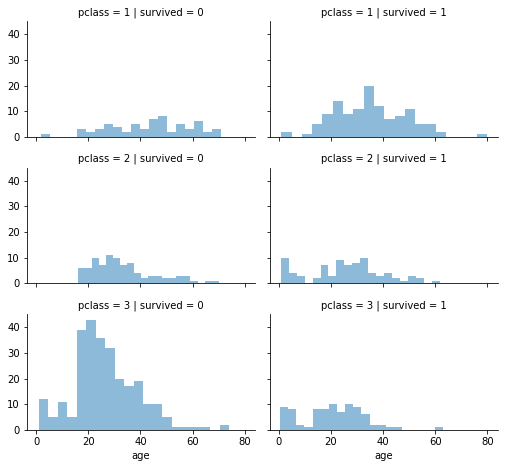

In [16]:
grid = sns.FacetGrid(train_data, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();


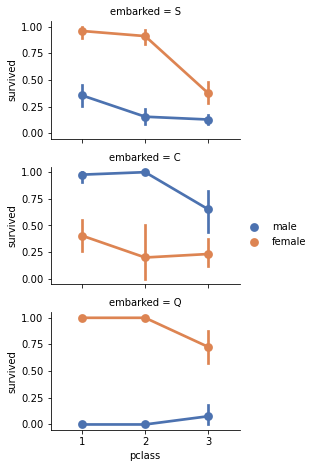

In [17]:

grid = sns.FacetGrid(train_data, row='embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived','sex', palette='deep')
grid.add_legend()

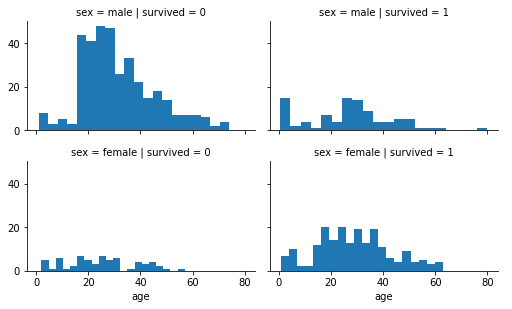

In [18]:
grid = sns.FacetGrid(train_data, row='sex', col='survived', size=2.2, aspect=1.6)
grid.map(plt.hist,'age',bins=20)
grid.add_legend();

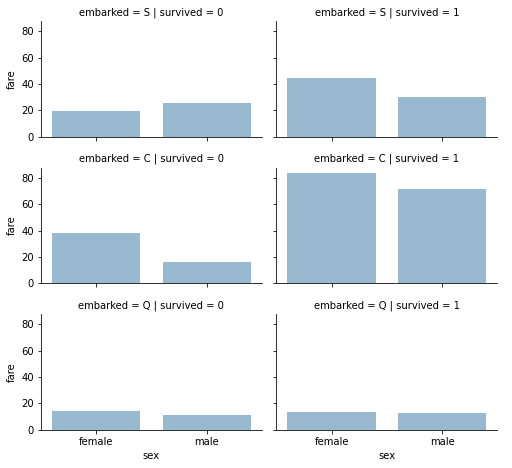

In [19]:
grid = sns.FacetGrid(train_data, row='embarked', col='survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()

## Data wrangling

In [20]:
print("Before", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)
train_data = train_data.drop(['ticket', 'cabin'], axis=1)
test_data = test_data.drop(['ticket', 'cabin'], axis=1)
combine = [train_data, test_data]

"After", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

## Extracting from existing

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['Title'], train_data['sex'])

sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'survived']].groupby(['Title'], as_index=False).mean()

,Title,survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [23]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,passengerId,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [24]:
train_data['Title'].value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [25]:
print(combine[0].head())

   passengerId  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch     fare embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1  


In [26]:
train_data = train_data.drop(['name', 'passengerId'], axis=1)
test_data = test_data.drop(['name'], axis=1)
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

In [27]:
train_data.shape
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


## Converting a categorical feature

In [28]:
for dataset in combine:
    dataset['sex'] = dataset['sex'].map( {'female': 1, 'male': 0}).astype(int)
print(train_data.head())

   survived  pclass  sex   age  sibsp  parch     fare embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1


In [29]:
print (test_data.head())

   passengerId  pclass  sex   age  sibsp  parch     fare embarked  Title
0          892       3    0  34.5      0      0   7.8292        Q      1
1          893       3    1  47.0      1      0   7.0000        S      3
2          894       2    0  62.0      0      0   9.6875        Q      1
3          895       3    0  27.0      0      0   8.6625        S      1
4          896       3    1  22.0      1      1  12.2875        S      3


## Numerical continuous feature

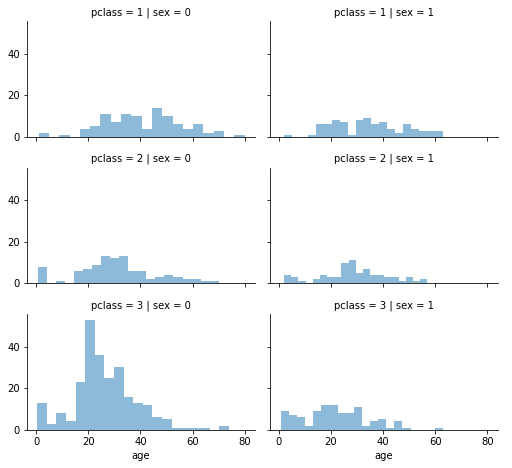

In [30]:
grid = sns.FacetGrid(train_data, row='pclass', col='sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [31]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [32]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['sex'] == i) & (dataset['pclass'] == j+1)]['age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.age.isnull()) & (dataset.sex == i) & (dataset.pclass == j+1),'age'] = guess_ages[i,j]
    dataset['age'] = dataset['age'].astype(int)
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [33]:
train_data['AgeBand'] = pd.cut(train_data['age'], 5)
train_data[['AgeBand', 'survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [34]:
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 16, 'age'] = 0
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[ dataset['age'] > 64, 'age']
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [35]:
train_data = train_data.drop(['AgeBand'], axis=1)
combine = [train_data, test_data]
train_data.head()
test_data.head()

,passengerId,pclass,sex,age,sibsp,parch,fare,embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


In [36]:
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [37]:
test_data.head()

,passengerId,pclass,sex,age,sibsp,parch,fare,embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


## Combining existing features

In [38]:
for dataset in combine:
    dataset['FamilySize'] = dataset['sibsp'] + dataset['parch'] + 1

In [39]:
train_data.head()
train_data[['FamilySize', 'survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='survived', ascending=False)

,FamilySize,survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int32  
 3   age         891 non-null    int32  
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   Title       891 non-null    int64  
 9   FamilySize  891 non-null    int64  
dtypes: float64(1), int32(2), int64(6), object(1)
memory usage: 62.8+ KB


In [41]:
train_data['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [42]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [43]:
train_data.head()
train_data[['IsAlone', 'survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,survived
0,0,0.505650
1,1,0.303538


In [44]:
dropped_one = train_data['parch']
dropped_two = train_data['sibsp']
dropped_three = train_data['FamilySize']
dropped_one

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: parch, Length: 891, dtype: int64

In [45]:
test_data.head()

,passengerId,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,0,7.8292,Q,1,1,1
1,893,3,1,2,1,0,7.0000,S,3,2,0
2,894,2,0,3,0,0,9.6875,Q,1,1,1
3,895,3,0,1,0,0,8.6625,S,1,1,1
4,896,3,1,1,1,1,12.2875,S,3,3,0


In [46]:
combine = [train_data, test_data]

train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,2,1,0,71.2833,C,3,2,0
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,0
4,0,3,0,2,0,0,8.0500,S,1,1,1


In [47]:
for dataset in combine:
    dataset['age*Class'] = dataset.age * dataset.pclass

train_data.loc[:, ['age*Class', 'age', 'pclass']].head(10)

,age*Class,age,pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [48]:
train_data['age*Class'].value_counts()

3      382
2      196
0      100
6       87
1       59
4       47
9        9
71       2
65       2
222      1
210      1
195      1
140      1
132      1
80       1
70       1
Name: age*Class, dtype: int64

## Completing categorical feature

In [49]:
freq_port = train_data['embarked'].dropna().mode()[0]
freq_port

'S'

In [50]:
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].fillna(freq_port)
train_data[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Converting categorical feature to numeric

In [51]:
for dataset in combine:
    dataset['embarked'] = dataset['embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class
0,0,3,0,1,1,0,7.2500,0,1,2,0,3
1,1,1,1,2,1,0,71.2833,1,3,2,0,2
2,1,3,1,1,0,0,7.9250,0,2,1,1,3
3,1,1,1,2,1,0,53.1000,0,3,2,0,2
4,0,3,0,2,0,0,8.0500,0,1,1,1,6


In [52]:
test_data['fare'].fillna(test_data['fare'].dropna().median(), inplace=True)
test_data.head()

,passengerId,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class
0,892,3,0,2,0,0,7.8292,2,1,1,1,6
1,893,3,1,2,1,0,7.0000,0,3,2,0,6
2,894,2,0,3,0,0,9.6875,2,1,1,1,6
3,895,3,0,1,0,0,8.6625,0,1,1,1,3
4,896,3,1,1,1,1,12.2875,0,3,3,0,3


In [53]:
train_data['FareBand'] = pd.qcut(train_data['fare'], 4)
train_data[['FareBand', 'survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [54]:
for dataset in combine:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[ dataset['fare'] > 31, 'fare'] = 3
    dataset['fare'] = dataset['fare'].astype(int)
train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]
train_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class
0,0,3,0,1,1,0,0,0,1,2,0,3
1,1,1,1,2,1,0,3,1,3,2,0,2
2,1,3,1,1,0,0,1,0,2,1,1,3
3,1,1,1,2,1,0,3,0,3,2,0,2
4,0,3,0,2,0,0,1,0,1,1,1,6
5,0,3,0,1,0,0,1,2,1,1,1,3
6,0,1,0,3,0,0,3,0,1,1,1,3
7,0,3,0,0,3,1,2,0,4,5,0,0
8,1,3,1,1,0,2,1,0,3,3,0,3
9,1,2,1,0,1,0,2,1,3,2,0,0


In [55]:
test_data.head(10)

,passengerId,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class
0,892,3,0,2,0,0,0,2,1,1,1,6
1,893,3,1,2,1,0,0,0,3,2,0,6
2,894,2,0,3,0,0,1,2,1,1,1,6
3,895,3,0,1,0,0,1,0,1,1,1,3
4,896,3,1,1,1,1,1,0,3,3,0,3
5,897,3,0,0,0,0,1,0,1,1,1,0
6,898,3,1,1,0,0,0,2,2,1,1,3
7,899,2,0,1,1,1,2,0,1,3,0,2
8,900,3,1,1,0,0,0,1,3,1,1,3
9,901,3,0,1,2,0,2,0,1,3,0,3


In [56]:
copy_df=train_data.copy()
copyTest_df=test_data.copy()

## Encoding to numeric 

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
train_Embarked = copy_df["embarked"].values.reshape(-1,1)
test_Embarked = copyTest_df["embarked"].values.reshape(-1,1)

In [59]:
onehot_encoder = OneHotEncoder(sparse=False)
train_OneHotEncoded = onehot_encoder.fit_transform(train_Embarked)
test_OneHotEncoded = onehot_encoder.fit_transform(test_Embarked)

In [60]:
copy_df["EmbarkedS"] = train_OneHotEncoded[:,0]
copy_df["EmbarkedC"] = train_OneHotEncoded[:,1]
copy_df["EmbarkedQ"] = train_OneHotEncoded[:,2]
copyTest_df["EmbarkedS"] = test_OneHotEncoded[:,0]
copyTest_df["EmbarkedC"] = test_OneHotEncoded[:,1]
copyTest_df["EmbarkedQ"] = test_OneHotEncoded[:,2]

In [61]:
copy_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,0,3,0,1,1,0,0,0,1,2,0,3,1.0,0.0,0.0
1,1,1,1,2,1,0,3,1,3,2,0,2,0.0,1.0,0.0
2,1,3,1,1,0,0,1,0,2,1,1,3,1.0,0.0,0.0
3,1,1,1,2,1,0,3,0,3,2,0,2,1.0,0.0,0.0
4,0,3,0,2,0,0,1,0,1,1,1,6,1.0,0.0,0.0


In [62]:
copyTest_df.head()

,passengerId,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,892,3,0,2,0,0,0,2,1,1,1,6,0.0,0.0,1.0
1,893,3,1,2,1,0,0,0,3,2,0,6,1.0,0.0,0.0
2,894,2,0,3,0,0,1,2,1,1,1,6,0.0,0.0,1.0
3,895,3,0,1,0,0,1,0,1,1,1,3,1.0,0.0,0.0
4,896,3,1,1,1,1,1,0,3,3,0,3,1.0,0.0,0.0


In [63]:
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class
0,0,3,0,1,1,0,0,0,1,2,0,3
1,1,1,1,2,1,0,3,1,3,2,0,2
2,1,3,1,1,0,0,1,0,2,1,1,3
3,1,1,1,2,1,0,3,0,3,2,0,2
4,0,3,0,2,0,0,1,0,1,1,1,6


In [64]:
test_data.head()

,passengerId,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class
0,892,3,0,2,0,0,0,2,1,1,1,6
1,893,3,1,2,1,0,0,0,3,2,0,6
2,894,2,0,3,0,0,1,2,1,1,1,6
3,895,3,0,1,0,0,1,0,1,1,1,3
4,896,3,1,1,1,1,1,0,3,3,0,3


## Creating and Training a model

In [65]:
X_trainTest = copy_df.drop(copy_df.columns[[0,5]],axis=1)
Y_trainTest = copy_df["survived"]
X_testTest = copyTest_df.drop(copyTest_df.columns[[0,5]],axis=1)
X_trainTest.head()

,pclass,sex,age,sibsp,fare,embarked,Title,FamilySize,IsAlone,age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,3,0,1,1,0,0,1,2,0,3,1.0,0.0,0.0
1,1,1,2,1,3,1,3,2,0,2,0.0,1.0,0.0
2,3,1,1,0,1,0,2,1,1,3,1.0,0.0,0.0
3,1,1,2,1,3,0,3,2,0,2,1.0,0.0,0.0
4,3,0,2,0,1,0,1,1,1,6,1.0,0.0,0.0


In [66]:
X_testTest.head()

,pclass,sex,age,sibsp,fare,embarked,Title,FamilySize,IsAlone,age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,3,0,2,0,0,2,1,1,1,6,0.0,0.0,1.0
1,3,1,2,1,0,0,3,2,0,6,1.0,0.0,0.0
2,2,0,3,0,1,2,1,1,1,6,0.0,0.0,1.0
3,3,0,1,0,1,0,1,1,1,3,1.0,0.0,0.0
4,3,1,1,1,1,0,3,3,0,3,1.0,0.0,0.0


In [67]:
logReg = LogisticRegression()
logReg.fit(X_trainTest,Y_trainTest)
acc = logReg.score(X_trainTest,Y_trainTest)
acc

0.8215488215488216

In [68]:
X_train = train_data.drop("survived", axis=1)
Y_train = train_data["survived"]
X_test  = test_data.drop("passengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class
0,3,0,1,1,0,0,0,1,2,0,3
1,1,1,2,1,0,3,1,3,2,0,2
2,3,1,1,0,0,1,0,2,1,1,3
3,1,1,2,1,0,3,0,3,2,0,2
4,3,0,2,0,0,1,0,1,1,1,6


In [69]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,Title,FamilySize,IsAlone,age*Class
0,3,0,2,0,0,0,2,1,1,1,6
1,3,1,2,1,0,0,0,3,2,0,6
2,2,0,3,0,0,1,2,1,1,1,6
3,3,0,1,0,0,1,0,1,1,1,3
4,3,1,1,1,1,1,0,3,3,0,3


In [70]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logReg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,sex,2.195517
6,embarked,0.454802
2,age,0.404284
4,parch,0.181296
5,fare,0.098977
10,age*Class,-0.101649
7,Title,-0.273404
0,pclass,-0.298451
3,sibsp,-0.342211
9,IsAlone,-0.429841


In [71]:
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)
acc_log = round(logReg.score(X_train, Y_train) * 100, 2)
acc_log

82.15

In [72]:
svcTest = SVC()
svcTest.fit(X_trainTest, Y_trainTest)
acc_svcTest = round(svcTest.score(X_trainTest, Y_trainTest)*100,2)
acc_svcTest

81.71

In [73]:
print("Support Vector Machines")
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

Support Vector Machines


81.26

In [74]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.07

In [75]:
print("Gaussian Naive Bayes")

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

Gaussian Naive Bayes


72.39

In [76]:
print ("Stochastic Gradient Descent")

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

Stochastic Gradient Descent


78.23

In [77]:
print("Decision Tree")

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

Decision Tree


89.11

In [78]:
random_forestTest = RandomForestClassifier(n_estimators=100)
random_forestTest.fit(X_trainTest, Y_trainTest)
acc_random_forestTest = round(random_forestTest.score(X_trainTest, Y_trainTest) * 100, 2)
acc_random_forestTest

89.11

In [79]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.11

In [80]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent',  
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_sgd,  acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.11
6,Decision Tree,89.11
1,KNN,85.07
2,Logistic Regression,82.15
0,Support Vector Machines,81.26
5,Stochastic Gradient Decent,78.23
4,Naive Bayes,72.39
